In [ ]:
from typing import List, Dict, Set
import string
from tqdm import tqdm

def tokenize(text: str) -> Set[str]:
    translator = str.maketrans('', '', string.punctuation)
    cleaned = text.translate(translator).lower()
    return set(cleaned.split())

def jaccard_similarity(set1: Set[str], set2: Set[str]) -> float:
    intersection = set1 & set2
    union = set1 | set2
    return len(intersection) / len(union) if union else 0

def find_similar_lines(lines: List[str], threshold: float = 0.5) -> Dict[int, List[int]]:
    tokenized_lines = [tokenize(line) for line in lines]
    similar_lines = {i: [] for i in range(len(lines))}

    for i in tqdm(range(len(tokenized_lines))):
        for j in range(i + 1, len(tokenized_lines)):  # j > i avoids duplicates
            sim = jaccard_similarity(tokenized_lines[i], tokenized_lines[j])
            if sim >= threshold:
                similar_lines[i].append(j)
                # Uncomment the following line if you want bidirectional mapping
                # similar_lines[j].append(i)
    return similar_lines

In [ ]:

file_path = "/Users/smukherjee/Documents/Resources/AI-knowledge-base/content/KB/quotes.md"  # replace with your actual file path

with open(file_path, "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f if line.strip()]  # skip empty lines

results = find_similar_lines(lines, threshold=0.8)  # Adjust threshold as needed


In [ ]:

for i, similar_idxs in results.items():
    if len(similar_idxs) > 0:
        if len(lines[i]) > 9:
            print(f"Line {i}: {lines[i]}")
            print(f"  Similar lines: {similar_idxs}")


In [ ]:
import spacy
from math import sqrt, pow, exp


In [ ]:
import spacy
from tqdm import tqdm

nlp = spacy.load("en_core_web_lg")

In [ ]:
with open("/Users/smukherjee/Documents/Resources/AI-knowledge-base/content/KB/quotes.md", "r") as f:
    all_sentences = f.readlines()

In [ ]:
import nltk

In [ ]:
all_sentences[5:40]

In [ ]:
for i, s1 in tqdm(list(enumerate(all_sentences[5:], start=5))):  # Start at 5 for correct original line indices
    for j, s2 in enumerate(all_sentences[5:], start=5):
        if i != j and len(s1) > 5:
            print(s1,s2)
            dist = nltk.edit_distance(s1, s2)
            if dist < 10:  # tweak this threshold based on how strict you want it
                print(f"[Line {i}] {s1}")
                print(f"[Line {j}] {s2}")
                print(f"=> Edit distance: {dist}\n")

        if i == 40:
            exit(0)


In [ ]:
for sentence in all_sentences:
    for sentence_2 in all_sentences:
        similarity = nlp(sentence)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [ ]:
embeddings = list(embeddings)

In [ ]:


distances = pairwise_distances(X=embeddings_test.reshape(-1, 1), Y=embeddings_test.reshape(-1, 1))

sns.heatmap(distances, square=True, annot=True, cbar=False, cmap='Blues');


In [ ]:
import matplotlib.pyplot as plt

plt.

In [ ]:
index = 10
print(all_sentences[index])
similar_sentences = [j for j,val in enumerate(simi[index]) if (val > 0.8 and j != index)]
similar_sentences

In [ ]:
# index = 10
for index, originalsentence in enumerate(all_sentences):
    if len(originalsentence)>2:
        similar_sentences = [j for j,val in enumerate(simi[index]) if (val > 0.8 and j != index)]
        if len(similar_sentences) >0:
            for duplicate_sentence in similar_sentences:
                print(duplicate_sentence, originalsentence, index)
                break

In [ ]:
for i,sentence1array in enumerate(simi):
    if len(all_sentences[i]) >0:
        for j, sentence2array in enumerate(sentence1array):
            for k, sentence2 in enumerate(sentence2array):
                if sentence2 > 0.8 and sentence2 < 1.0:
                    print(i,j, sentence1array, sentence2, all_sentences[i], all_sentences[j])
                # print(f"Position {i}, {j}")
        # break
                # print(all_sentences[i], all_sentences[j])

In [ ]:
import pickle

In [ ]:
with open("/Users/smukherjee/Documents/Projects/ALFIE/alfie_automl_engine/autogluon_output/1750433120.80001/predictor.pkl", "rb") as fp:
    predictor = pickle.load(fp)

In [ ]:
import pandas as pd
df = pd.read_csv("sample_data/knot_theory/test.csv")

In [ ]:
predictor.predict(df)

# Overview
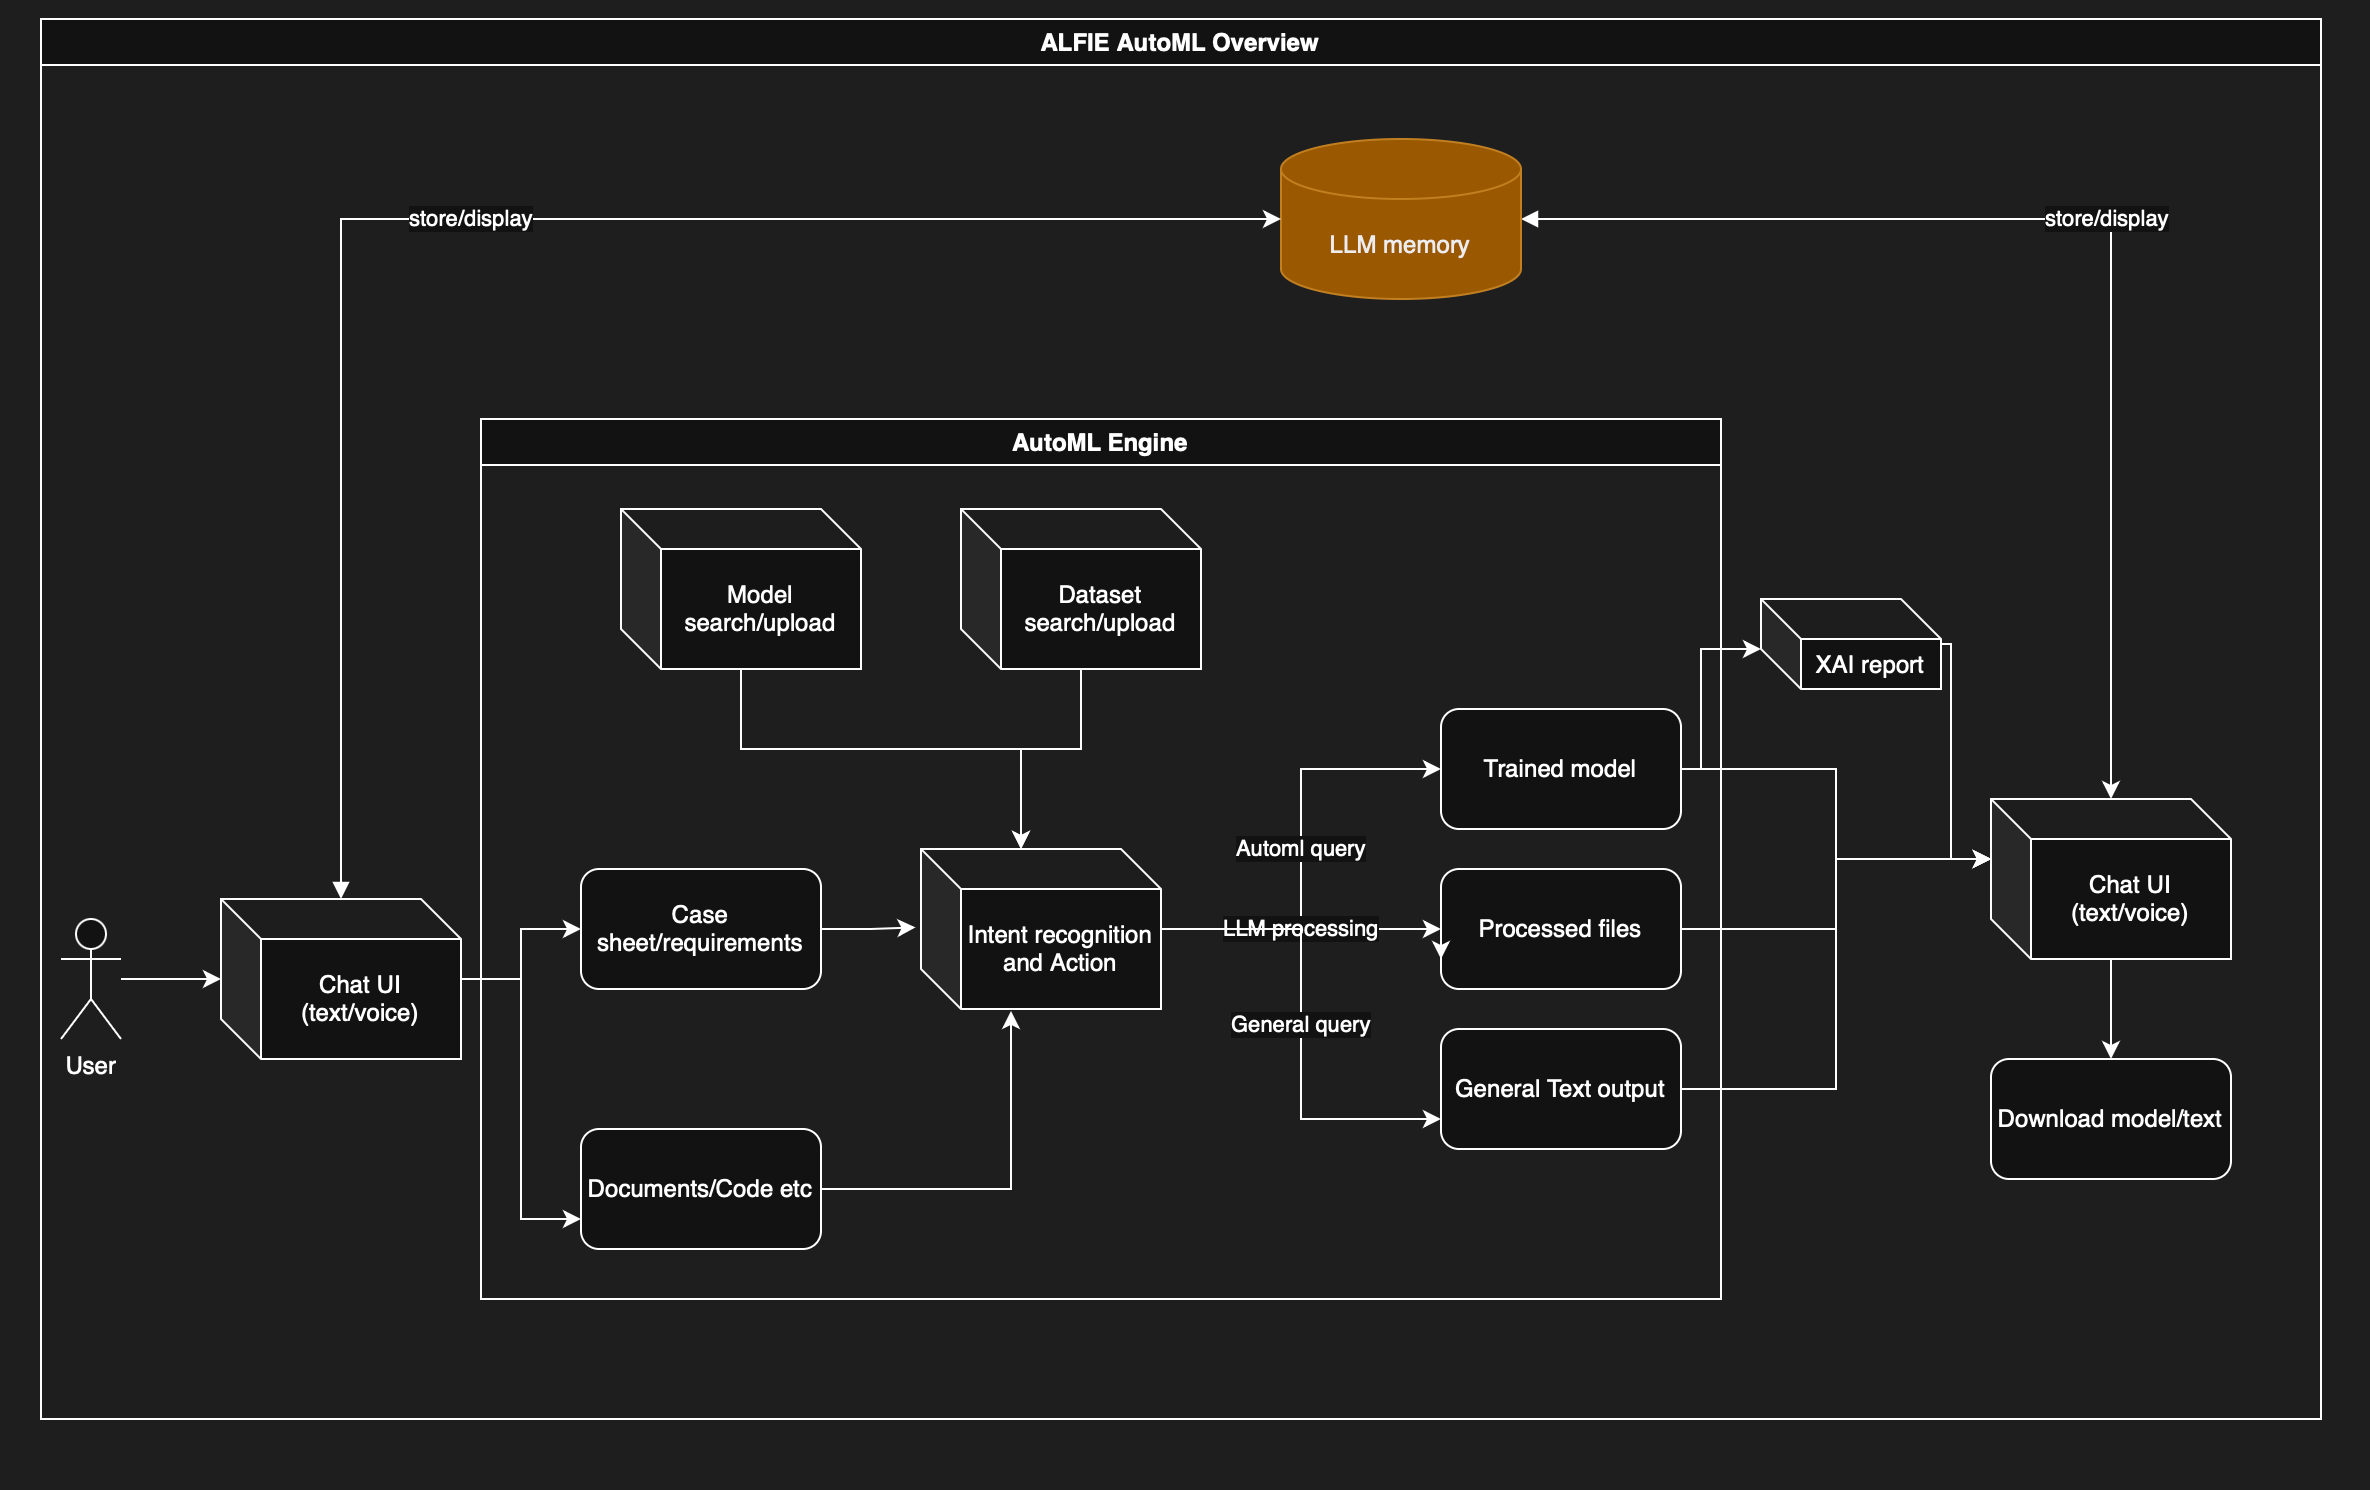

# Dataset registry
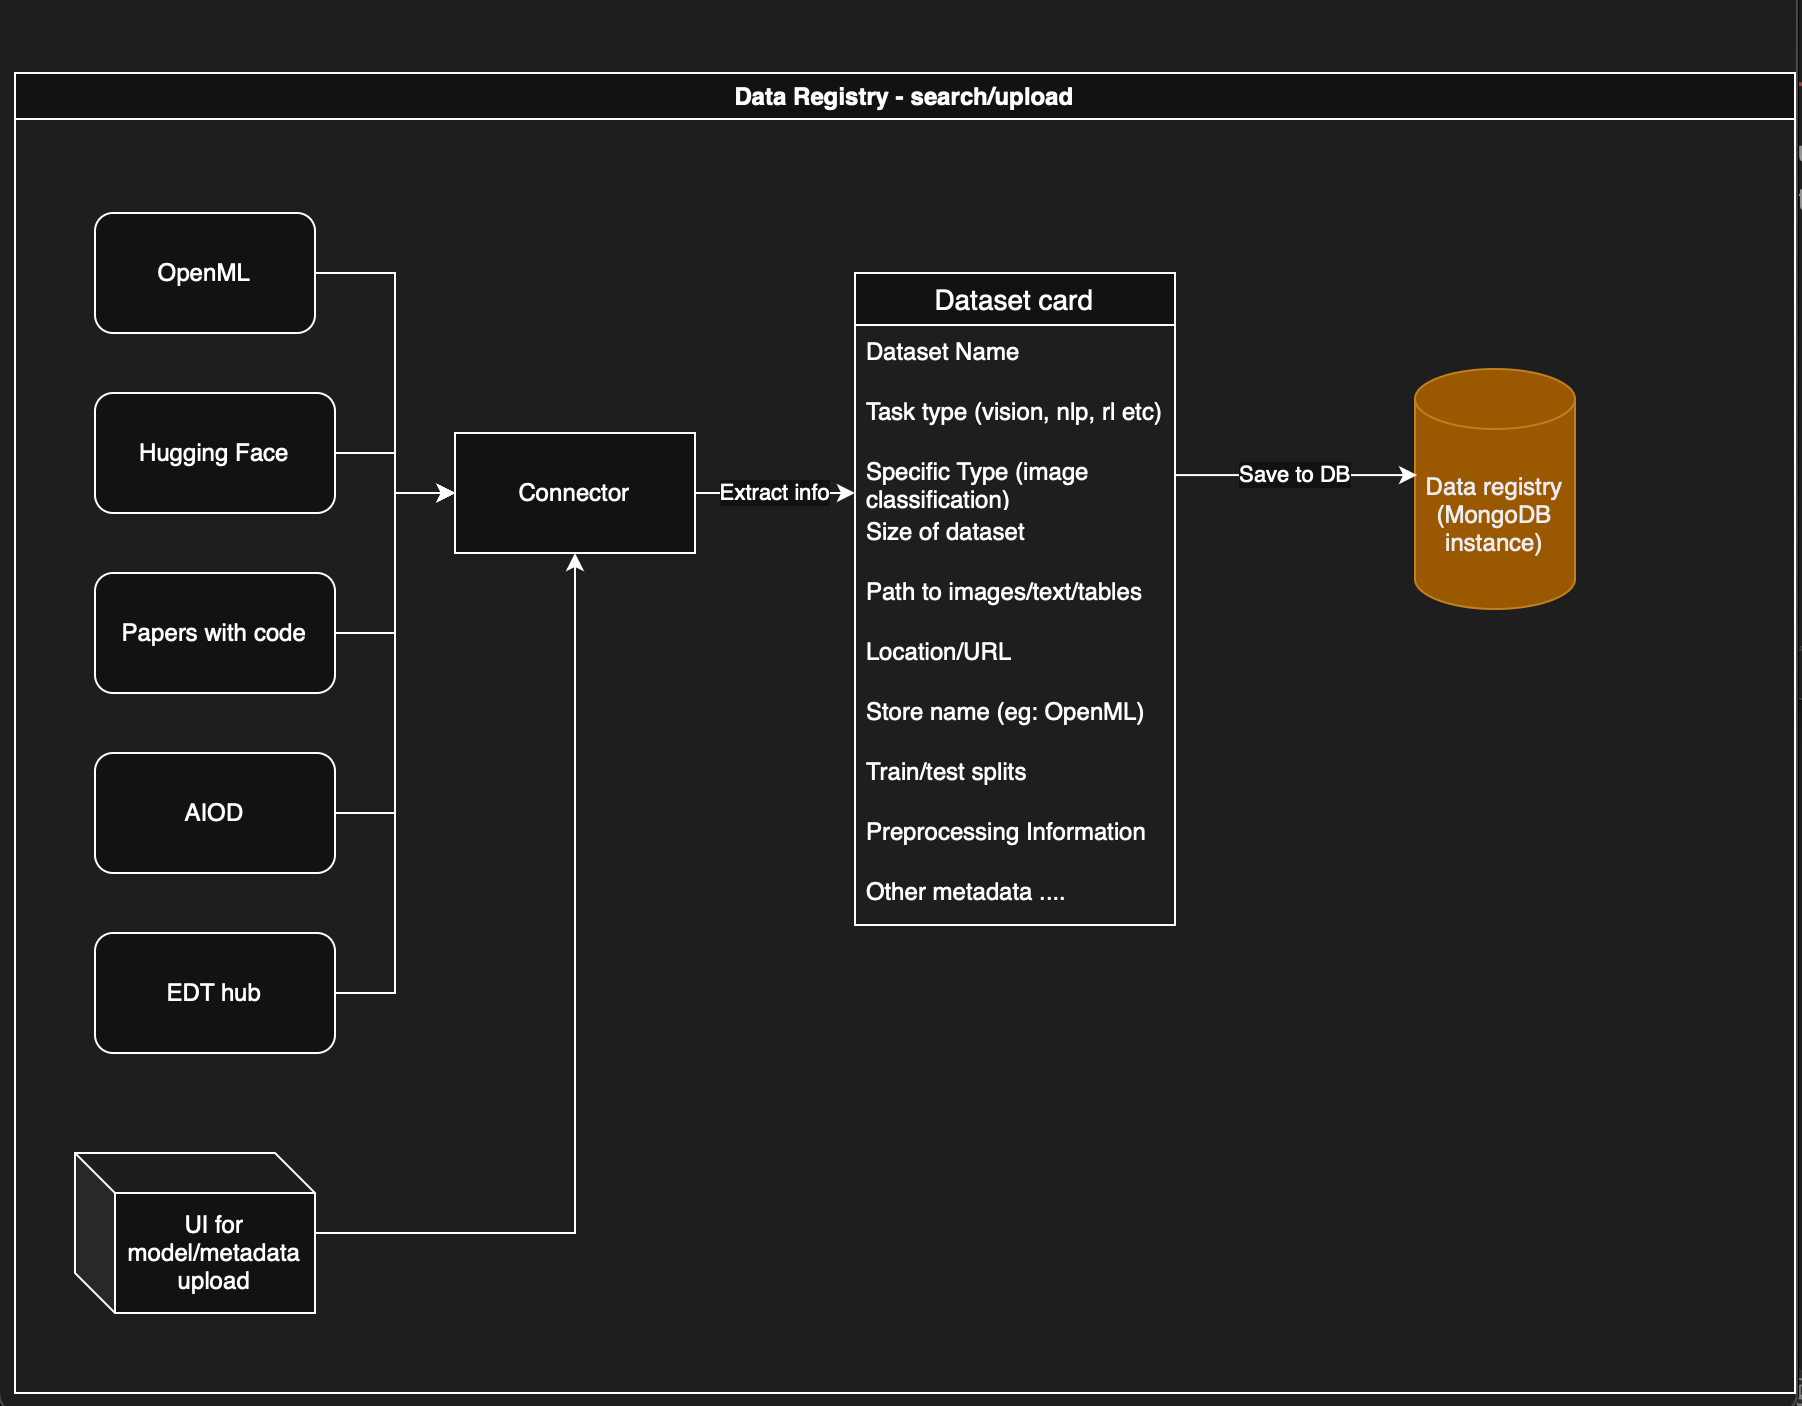

## Dataset Database schema

## Connectors

### Search model registry

# Model registry
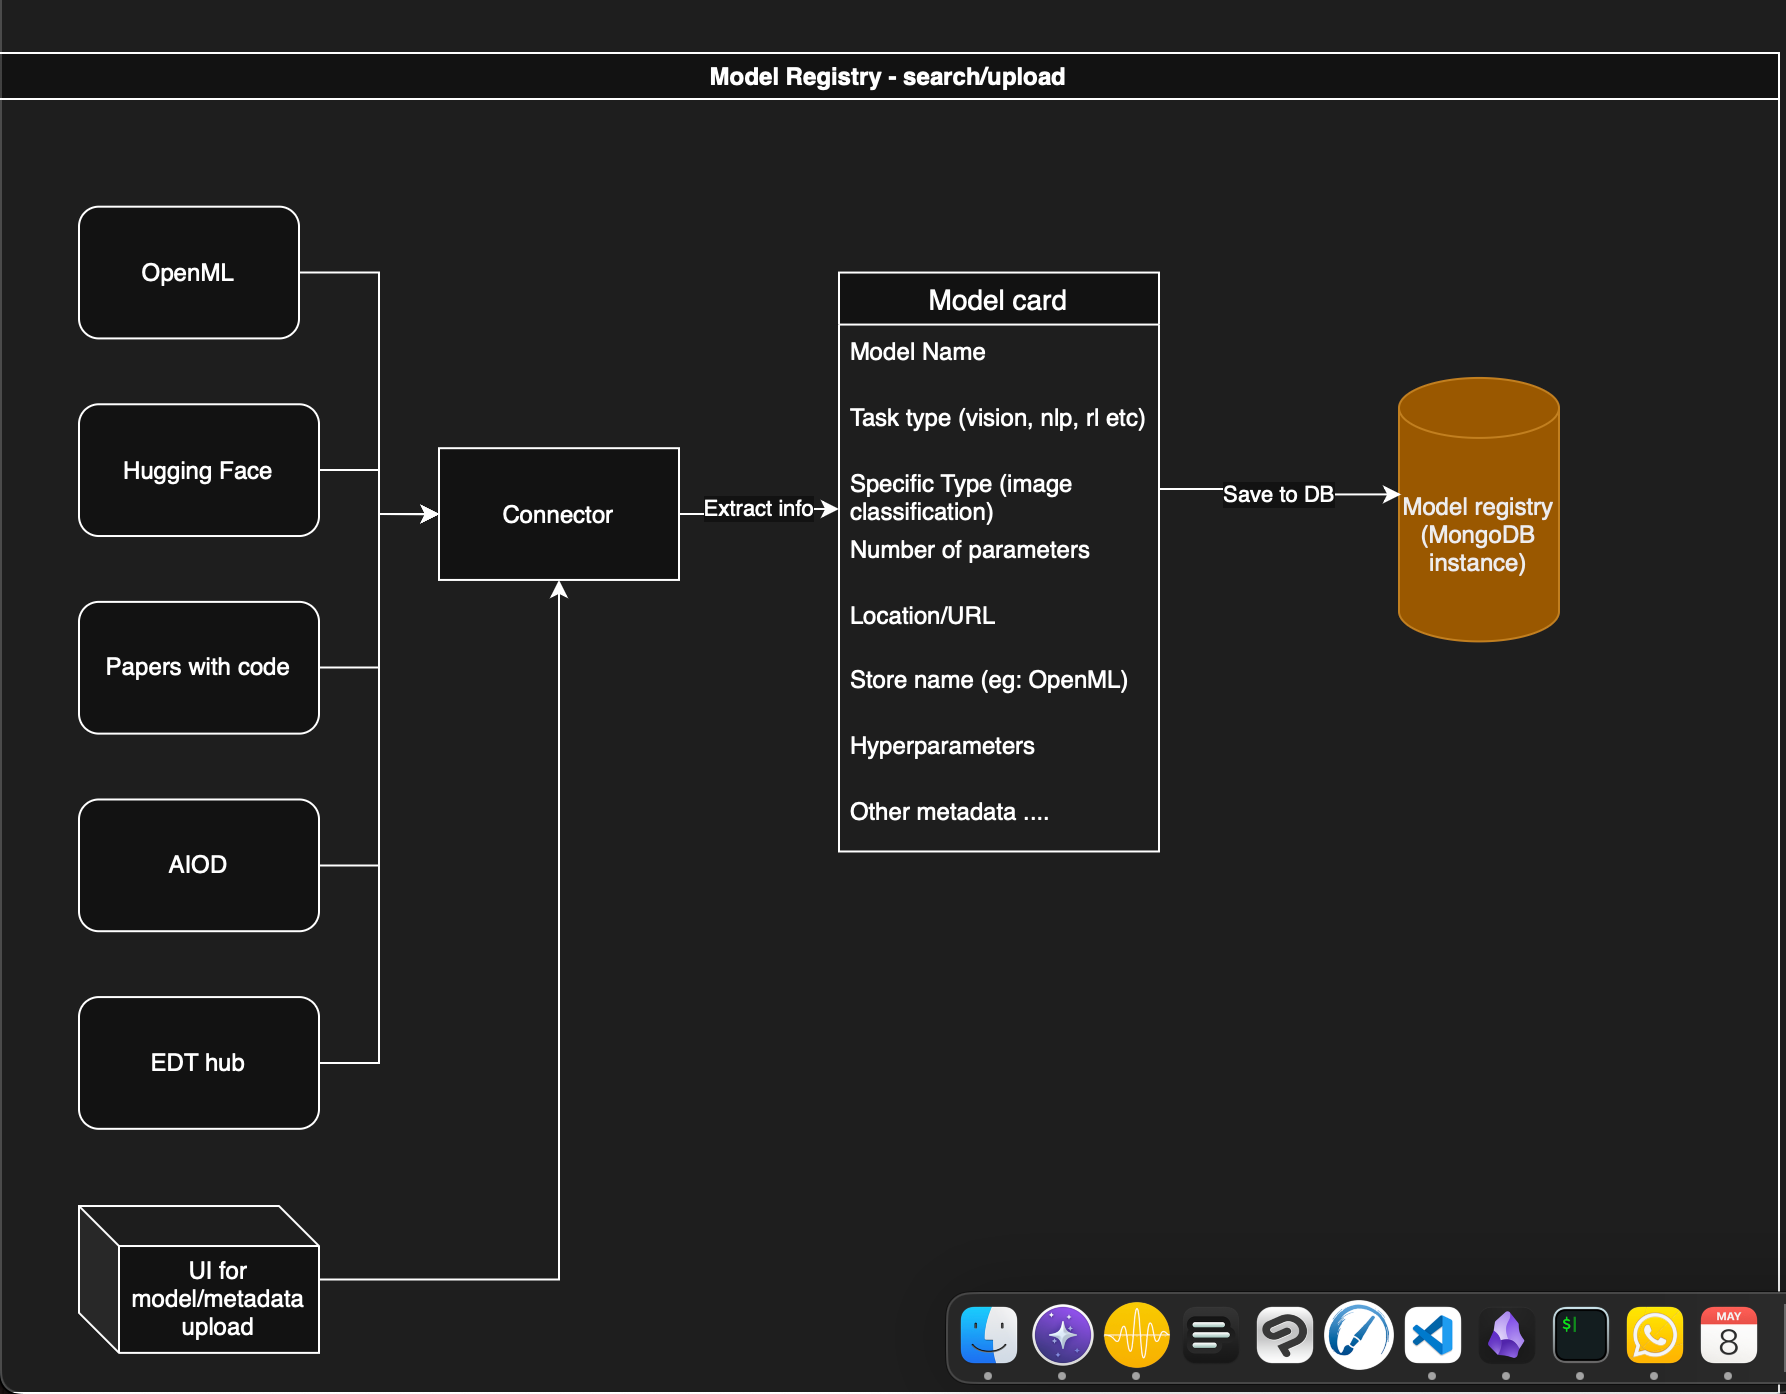

## Model Database schema

## Connectors

### Search model registry

# Input source -> LLM

# Intent recognition LLM
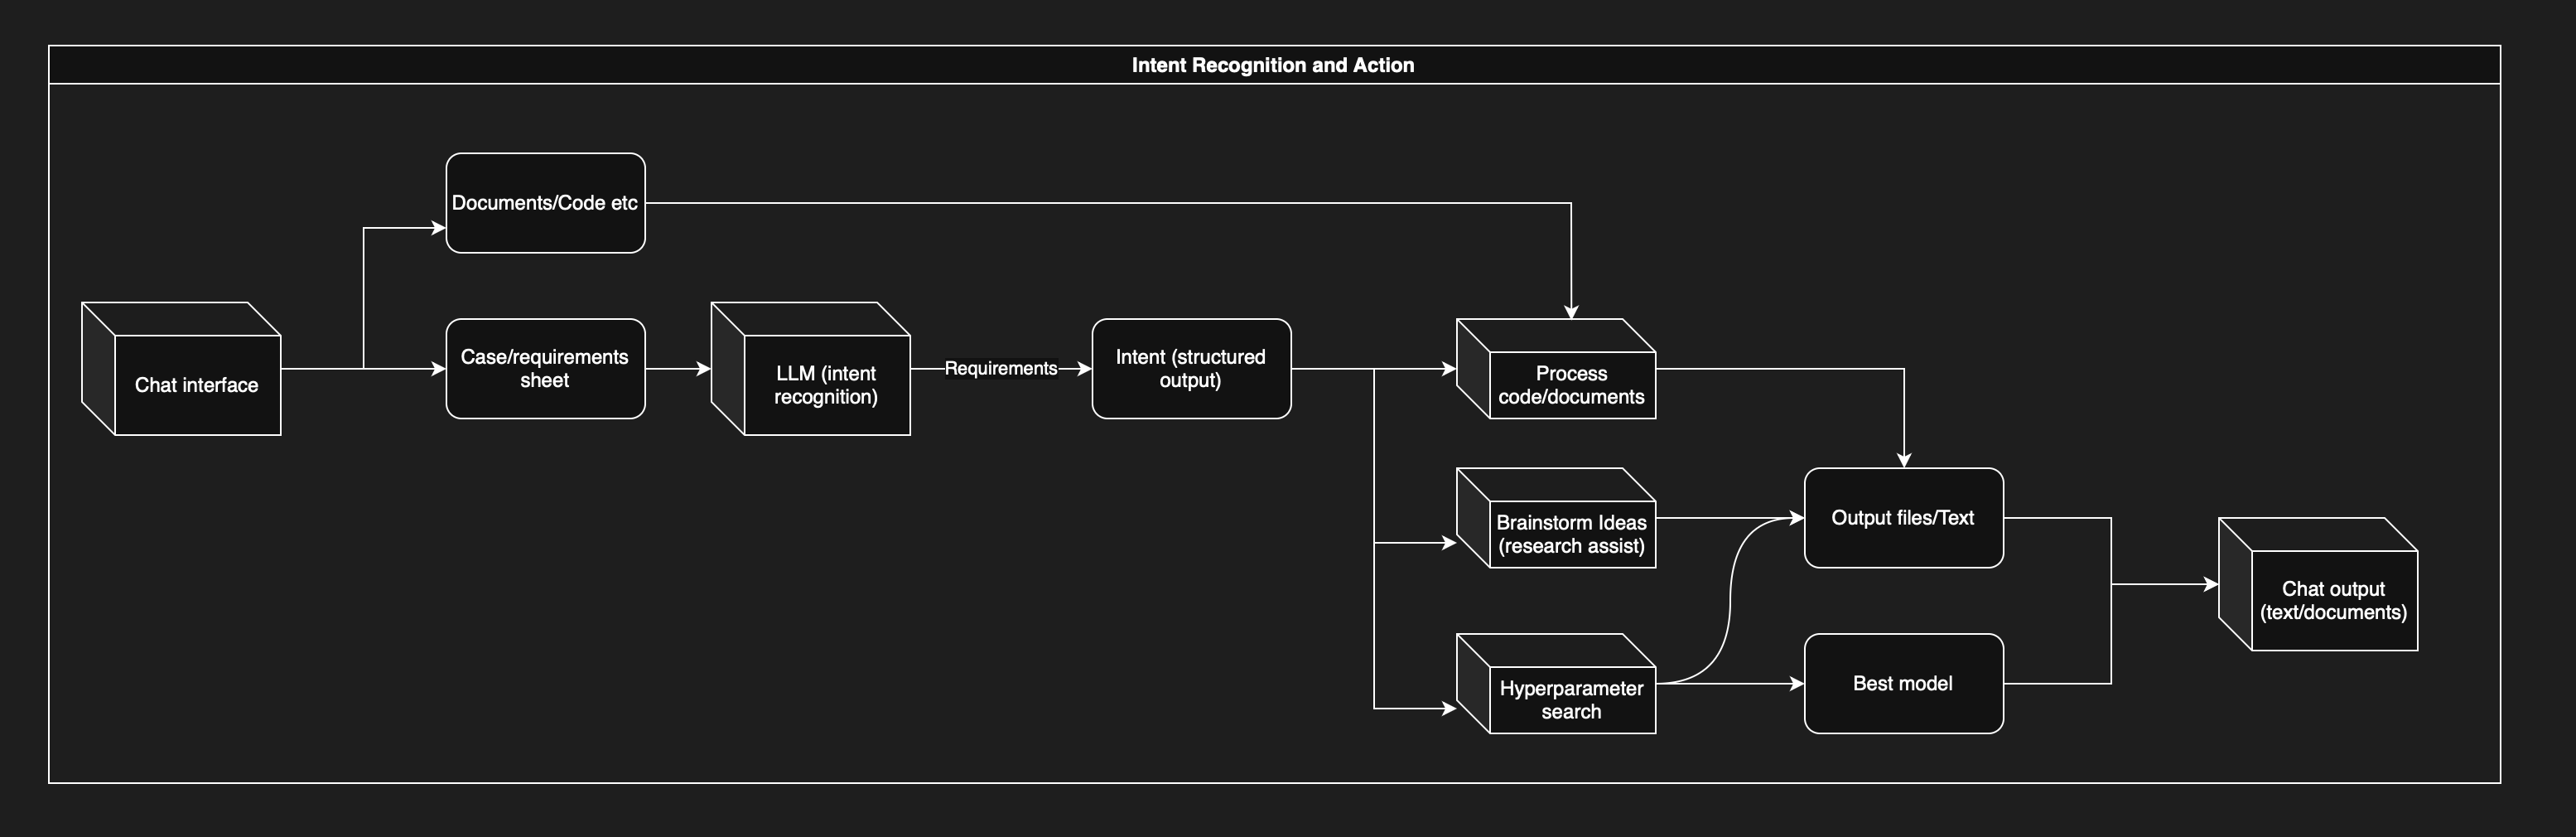

## Refs
- https://github.com/mpaepper/llm_agents/
- https://raw.githubusercontent.com/hwchase17/langchain/master/langchain/utilities/google_search.py

## Chat LLM

In [ ]:
import nest_asyncio

nest_asyncio.apply()

In [ ]:
from pydantic import BaseModel
from pydantic_ai.exceptions import UnexpectedModelBehavior
from pydantic_ai import Agent
from pydantic_ai.models.openai import OpenAIModel
from pydantic_ai.providers.openai import OpenAIProvider

In [ ]:
class ModelOutput(BaseModel):
    """
    Agent output format
    enough_information: Does the agent have enough information to answer the question?
    extra_question: If not, what else does the agent need to know to answer the question else return an empty string
    needs_files_or_data: Does the user need to upload any files or data to answer the question/perform the task?
    wants_to_train: Does the agent want to train a new model given existing data?
    wants_to_use_existing_model: If the user wants to train a model, does it want to use an existing model?
    final_answer: The answer to the original input question
    """

    enough_information: bool
    extra_question: str
    needs_files_or_data: bool
    wants_to_train: bool
    wants_to_use_existing_model: bool
    final_answer: str


def create_ollama_agent(ModelOutput):
    ollama_model = OpenAIModel(
        model_name="llama3.2",
        provider=OpenAIProvider(base_url="http://localhost:11434/v1"),
    )
    system_prompt = (
        "Do not add any formatting to the answer. Do not repeat the questions. "
    )
    agent = Agent(ollama_model, output_type=ModelOutput, retries=2)
    return system_prompt, agent


def query_agent(system_prompt, agent, query):
    try:
        result = agent.run_sync(f"{system_prompt} {query}")
        return result.output
    except UnexpectedModelBehavior:
        print("The model behaved unexpectedly. Please check the model's output.")
        return "Agent failed to respond correctly."

In [ ]:
example_use_case = "/Users/smukherjee/Downloads/UAB ALFIE Updated Use Case .docx"

In [ ]:
from docx import Document

document = Document(example_use_case)

In [ ]:
entire_document = "\n".join(
    [document.paragraphs[num].text for num in range(len(document.paragraphs))]
)

In [ ]:
uploaded_file = entire_document

In [ ]:
system_prompt, agent = create_ollama_agent(ModelOutput)
extra_information_about_files = "The user has only uploaded a file of type docx"
# query = "Where were the olympics held in 2012?"
# query =  "Help me develop a face recognition application. I don'\''t have any training datasets or models. I plan to use the application on my employees, who are mainly white male Europeans. Advise me if there are any ethical restrictions on the model."
query = "Read the use case and tell me what to do"

query = f"{extra_information_about_files} {query}"

result = query_agent(system_prompt, agent, query)

In [ ]:
if result.needs_files_or_data and uploaded_file is not None:
    

## Trying just ollama 

In [ ]:
import asyncio
from ollama import AsyncClient
from pathlib import Path

In [ ]:
import nest_asyncio

nest_asyncio.apply()

In [ ]:
answer_format = """
Return the answer as a JSON object with the following keys. 
enough_information: bool = Does the agent have enough information to answer the question?
extra_question: str = If not, what else does the agent need to know to answer the question else return an empty string
needs_files_or_data: bool = Does the user need to upload any files or data to answer the question/perform the task?
wants_to_train: bool = Does the agent want to train a new model given existing data?
wants_to_use_existing_model: bool = If the user wants to train a model, does it want to use an existing model?
final_answer: str = The answer to the original input question 
"""

In [ ]:
async def chat(query):
    message = {"role": "user", "content": query}
    return await AsyncClient().chat(model="llama3.2", messages=[message])

In [ ]:
# Read a word document
from docx import Document


def read_word_document(path: Path) -> str:
    """
    Read a Word document and return its content as a string.
    """
    document_info = f"Agent has been given a file of type {path.suffix} and the content is as follows: "
    document = Document(str(path))
    try:
        # Check if the document is empty
        if not document.paragraphs:
            return "The document is empty."
    except Exception as e:
        return f"Error reading the document: {e}"
    finally:
        return document_info + "\n".join(
            [document.paragraphs[num].text for num in range(len(document.paragraphs))]
        )

In [ ]:
example_use_case = Path("/Users/smukherjee/Downloads/UAB ALFIE Updated Use Case .docx")
entire_document = read_word_document(example_use_case)
uploaded_file = entire_document

In [ ]:
additional_information = "The user has only uploaded a file of type docx. If they need to process the file, do so and return it in the JSON object in a separate field called {files} with a nested key {file_name}.{extension}. If they need to upload more files, ask them to do so."
query = "Read the use case and help me decide how to proceed with the project. What are the next steps?"

In [ ]:
query = f"{answer_format} {additional_information} {query}"
query = query + entire_document

In [ ]:
result = asyncio.run(chat(query))

In [ ]:
import json

In [ ]:
print(result.message.content)

In [ ]:
json.dumps(result.message.content)

In [ ]:
import asyncio
import json
from pathlib import Path
from typing import Optional

import nest_asyncio
from ollama import AsyncClient
from docx import Document
import re

nest_asyncio.apply()

In [ ]:
agent = InteractiveProjectAgent()
user_query = "Read the use case and help me decide how to proceed with the project."
files_to_upload = [
    Path("./sample_data/UAB ALFIE Updated Use Case .docx"),
    Path("./sample_data/test.html"),
    Path("./sample_data/test.css"),
]

In [ ]:
output = await asyncio.run(
    agent.interact(initial_query=user_query, file_path=files_to_upload)
)

In [ ]:
output

In [ ]:
import asyncio
import json
from pathlib import Path
from typing import Optional

import nest_asyncio
from ollama import AsyncClient
from docx import Document
import re

nest_asyncio.apply()

In [ ]:
def read_word_document(path: Path) -> str:
    if path.suffix.lower() != ".docx":
        return f"Unsupported file type: {path.suffix}"

    try:
        document = Document(str(path))
        if not document.paragraphs:
            return "The document is empty."
        return "\n".join(p.text for p in document.paragraphs)
    except Exception as e:
        return f"Error reading document: {e}"


def read_other_file_types(path: Path) -> str:
    if path.suffix.lower() in [".txt", ".csv", ".html", ".css"]:
        with open(path, "r") as file:
            return file.read()

In [ ]:
example_use_case = Path("./sample_data/UAB ALFIE Updated Use Case .docx")
sample_html = Path("./sample_data/test.html")
sample_css = Path("./sample_data/test.css")

entire_document = read_word_document(example_use_case)
entire_html = read_other_file_types(sample_html)
entire_css = read_other_file_types(sample_css)
uploaded_file = entire_document

In [ ]:
files = {
    "UAB ALFIE Updated Use Case.docx": entire_document,
    "test.html": entire_html,
    "test.css": entire_css,
}
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant. The user uploaded these files with the following contents as text",
    },
    {"role": "user", "content": json.dumps(files)},
    {
        "role": "user",
        "content": "Read the files and suggest modifications to html and css to meet ARIA standards. Return modified files in JSON format with keys as filenames.",
    },
]

In [ ]:
# messages = [
#     # {'role': 'user', 'content': answer_format},
#     {'role': 'user', 'content': entire_document},
#     # {'role': 'system', 'content': "The user has only uploaded a file of type docx. If they need to process the file, do so and return it in the JSON object in a separate field called {files} with a nested key {file_name}.{extension}. If they need to upload more files, ask them to do so."},
#     {'role': 'user', 'content': "Read the document/query and help me decide how to proceed with the project. What are the next steps?"},
#     {'role': 'user', 'content': entire_css},
#     {'role': 'user', 'content': entire_html},
#     {'role': 'system', 'content': "Make suggestions based on the query and/or use case the user provided. "},
#     {'role': 'user', 'content': "Give me the modified html and css files with the changes you suggested. The goal is to follow ARIA standards and make the website more accessible"}
# ]

In [ ]:
from ollama import chat

In [ ]:
def aoo():
    entire_document = read_word_document(example_use_case)
    entire_html = read_other_file_types(sample_html)
    entire_css = read_other_file_types(sample_css)

    combined_content = f"""
    Document:
    {entire_document}

    CSS:
    {entire_css}

    HTML:
    {entire_html}

    Instructions:
    Please suggest modifications to the HTML and CSS to meet ARIA standards and return the modified files as JSON.
    """

    messages = [
        {
            "role": "system",
            "content": "You are a helpful assistant improving web accessibility.",
        },
        {"role": "user", "content": combined_content},
    ]

    return chat(model="llama3.2", messages=messages, stream=True)
    # print(response.message.content)

In [ ]:
stream = aoo()
for chunk in stream:
    print(chunk["message"]["content"], end="", flush=True)

# Hyperparameter search
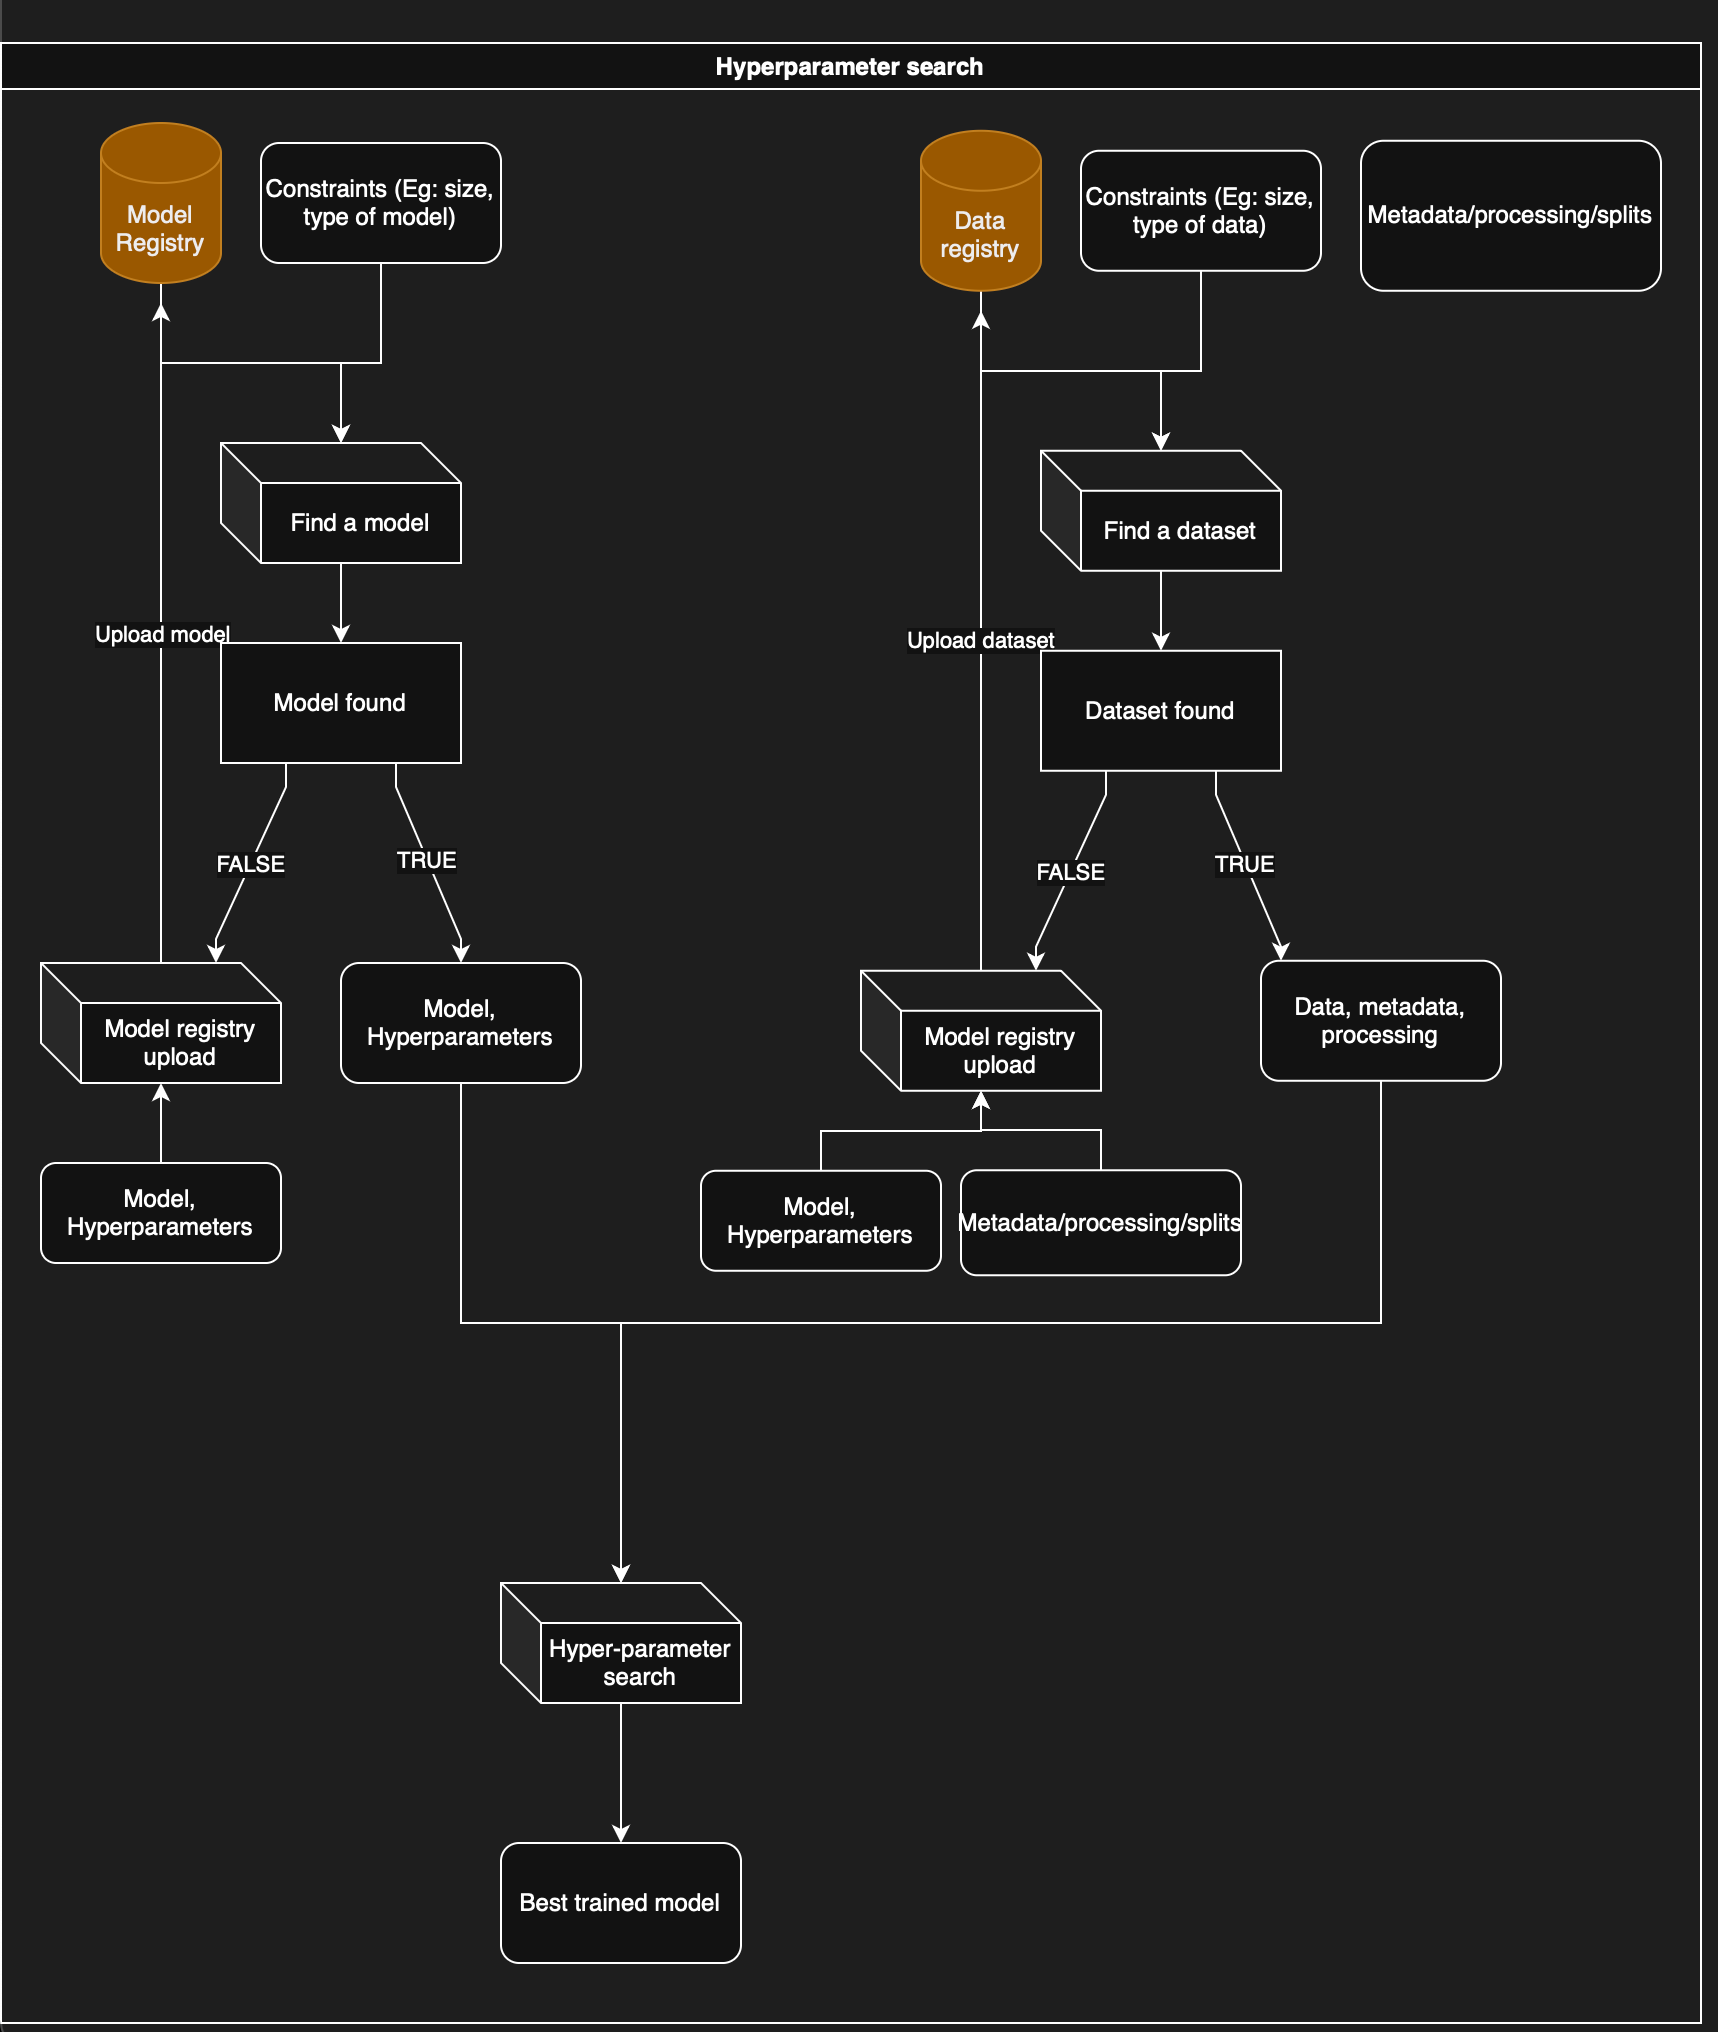

In [ ]:
import pandas as pd
from pathlib import Path
from typing import Optional, Union, Type
from pydantic import BaseModel
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from abc import ABC, abstractmethod
import openml

In [ ]:
class TabularTask(BaseModel):
    """
    Tabular task format
    """

    target_feature: str
    time_stamp_col: Optional[pd.DataFrame] = None
    train_file_path: Path
    test_file_path: Optional[Path] = None

    class Config:
        arbitrary_types_allowed = True

In [ ]:
class SupervisedClassificationTask(TabularTask):
    """
    Classification task format
    """

    task_type: str = "classification"


class SupervisedRegressionTask(TabularTask):
    """
    Regression task format
    """

    task_type: str = "regression"


class SupervisedTimeSeriesTask(TabularTask):
    """
    Regression task format
    """

    task_type: str = "time_series"
    time_stamp_col: str

In [ ]:
class TabularChecks:
    """Utility class for validating tabular data and checking target feature."""

    def __init__(
        self,
        target_feature: str,
        csv_file_path: Optional[Path] = None,
        df: Optional[pd.DataFrame] = None,
    ):
        self.target_feature = target_feature
        self.df = df
        self.csv_file_path = csv_file_path

        if self.df is None and self.csv_file_path is not None:
            self.df = self._load_csv()
        elif self.df is None:
            raise ValueError("Either a dataframe or csv_file_path must be provided.")

    def _load_csv(self) -> Optional[pd.DataFrame]:
        try:
            if self.csv_file_path is not None:
                return pd.read_csv(self.csv_file_path)
        except Exception as e:
            raise ValueError(f"Error reading CSV file '{self.csv_file_path}': {e}")

    def check_target_exists(self) -> bool:
        if self.df is not None:
            return self.target_feature in self.df.columns
        else:
            return False

    def __call__(self) -> Optional[pd.DataFrame]:
        self.check_target_exists()
        return self.df

In [ ]:
def load_and_validate_df(
    path: Optional[Path], target: str, df: Optional[pd.DataFrame] = None
) -> Optional[pd.DataFrame]:
    """Load and validate a dataframe from path or directly if provided."""
    return TabularChecks(target_feature=target, csv_file_path=path, df=df)()

In [ ]:
class BaseTabularAutoMLPipeline(ABC):
    """Base class for tabular AutoML pipelines."""

    def __init__(self, task):
        self.task = task
        self.train_df: Optional[pd.DataFrame] = None
        self.test_df: Optional[pd.DataFrame] = None
        self.model = None
        self.supported_tasks: list
        self._check_supported_task()

    def _check_supported_task(self) -> None:
        """Ensure the provided task is supported."""
        for supported_task in self.supported_tasks:
            if isinstance(self.task, supported_task):
                return

        if (
            type(self.task) is SupervisedTimeSeriesTask
            and self.task.time_stamp_col is None
        ):
            raise ValueError(
                "Time series task requires a time_stamp_col to be specified."
            )

        raise ValueError(
            f"Task type '{getattr(self.task, 'task_type', str(type(self.task)))}' is not supported. "
            f"Supported types: {[t.__name__ for t in self.supported_tasks]}"
        )

    def load_data(
        self,
        train_df: Optional[pd.DataFrame] = None,
        test_df: Optional[pd.DataFrame] = None,
    ) -> None:
        """Load training and testing data from DataFrame or path."""
        self.train_df = load_and_validate_df(
            path=self.task.train_file_path if train_df is None else None,
            target=self.task.target_feature,
            df=train_df,
        )
        if getattr(self.task, "test_file_path", None) or test_df is not None:
            self.test_df = load_and_validate_df(
                path=self.task.test_file_path if test_df is None else None,
                target=self.task.target_feature,
                df=test_df,
            )

    @abstractmethod
    def fit(self, time_limit: int = 60) -> None:
        """Train the model using the training dataset."""
        pass

    @abstractmethod
    def evaluate(self) -> Optional[pd.DataFrame]:
        """Evaluate the model on the test set and return evaluation results."""
        pass

In [ ]:
class AutoGluonTabularPipeline(BaseTabularAutoMLPipeline):
    """AutoML pipeline using AutoGluon."""

    def __init__(self, task):
        self.supported_tasks = [
            SupervisedClassificationTask,
            SupervisedRegressionTask,
            SupervisedTimeSeriesTask,
        ]
        super().__init__(task)
        if isinstance(self.task, SupervisedTimeSeriesTask):
            self.predictor = TimeSeriesPredictor(label=self.task.target_feature)
        self.predictor: Optional[TabularPredictor] = None

    def fit(self, time_limit: int = 60) -> None:
        if self.train_df is None:
            self.load_data()
        train_data = TabularDataset(self.train_df)
        self.predictor = TabularPredictor(label=self.task.target_feature).fit(
            train_data, time_limit=time_limit
        )

    def evaluate(self) -> Optional[pd.DataFrame]:
        if self.test_df is not None and self.predictor is not None:
            test_data = TabularDataset(self.test_df)
            return self.predictor.leaderboard(test_data)
        return None

In [ ]:
task = SupervisedTimeSeriesTask(
    target_feature="timestamp",
    train_file_path=Path("./sample_data/m4_hourly_subset/train.csv"),
    test_file_path=Path("./sample_data/m4_hourly_subset/test.csv"),
    time_stamp_col="timestamp",
)

pipeline = AutoGluonTabularPipeline(task)
pipeline.fit(time_limit=20)
leaderboard = pipeline.evaluate()
if leaderboard is not None:
    print(leaderboard)

In [ ]:
task = SupervisedClassificationTask(
    target_feature="signature",
    train_file_path=Path("./sample_data/knot_theory/train.csv"),
    test_file_path=Path("./sample_data/knot_theory/test.csv"),
)

pipeline = AutoGluonTabularPipeline(task)
pipeline.fit(time_limit=20)
leaderboard = pipeline.evaluate()
if leaderboard is not None:
    print(leaderboard)

In [ ]:
import openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

In [ ]:
class OpenMLDatasetHandler:
    """
    Handles OpenML task specific features
    """

    def __init__(self, dataset_id: int):
        self.dataset = openml.datasets.get_dataset(dataset_id)
        self.task_type = None

    def get_target_col_type(self, dataset, target_col_name):
        """
        Get the type of the target column based on it's values
        """
        try:
            if dataset.features:
                return next(
                    (
                        feature.data_type
                        for feature in dataset.features.values()
                        if feature.name == target_col_name
                    ),
                    None,
                )
        except Exception as e:
            print(f"Error getting target column type: {e}")
            return None

    def get_task_type(
        self,
    ) -> Optional[Union[SupervisedClassificationTask, SupervisedRegressionTask]]:
        try:
            target_col_name = self.dataset.default_target_attribute
            target_col_type = self.get_target_col_type(self.dataset, target_col_name)

            if target_col_type:
                if target_col_type in ["nominal", "string", "categorical"]:
                    self.task_type = SupervisedClassificationTask
                    # try:
                    #     self.class_labels = self.dataset.get_data()[0][target_col_name].unique()
                    # except Exception as e:
                    #     return "No class labels found"

                elif target_col_type == "numeric":
                    # evaluation_measure = "mean_absolute_error"
                    task_type = openml.tasks.TaskType.SUPERVISED_REGRESSION
                    self.task_type = SupervisedRegressionTask
                    # self.class_labels = []
                else:
                    return None

        except Exception as e:
            print(f"Error getting task type: {e}")
            return None

    def get_data(self) -> tuple[pd.DataFrame, pd.DataFrame]:
        X, y, _, _ = self.dataset.get_data(target=self.dataset.default_target_attribute)

        # Convert categorical columns to numerical
        for col in X.select_dtypes(include=["object", "category"]).columns:
            X[col] = X[col].astype("category").cat.codes.replace(-1, np.nan)

        # Encode target if it's categorical
        if y.dtype == "object" or y.dtype.name == "category":
            y = LabelEncoder().fit_transform(y)

        X = X.to_numpy(dtype=np.float32)
        y = np.array(y, dtype=np.int64)

        # Split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=1, stratify=y
        )

        train_df = pd.DataFrame(X_train)
        train_df["target"] = y_train

        test_df = pd.DataFrame(X_test)
        test_df["target"] = y_test

        return train_df, test_df

In [ ]:
openml_dataset_id = 1
train_df, test_df = OpenMLDatasetHandler(openml_dataset_id).get_data()

In [ ]:
task = SupervisedClassificationTask(
    target_feature="signature",
    train_file_path=Path("./sample_data/knot_theory/train.csv"),
    test_file_path=Path("./sample_data/knot_theory/test.csv"),
)

pipeline = AutoGluonTabularPipeline(task)
pipeline.fit(time_limit=20)
leaderboard = pipeline.evaluate()
if leaderboard is not None:
    print(leaderboard)

## Testing

In [ ]:
from old_src.handlers.openml_handler import OpenMLDatasetHandler
from old_src.tasks import *
from old_src.tabular_task.pipeline import *

In [ ]:
from pydantic import BaseModel, Field, ValidationError
from typing import Optional, Literal
import json
import asyncio
from ollama import AsyncClient

In [ ]:
# messages = [
#             {"role": "system", "content": self.instruction}
# ] + self.conversation_history

In [ ]:
client = AsyncClient()
user_input = "I want to have to predict classification "

conversation_history = []
task, conversation_history = await get_initial_response(
    client, user_input, conversation_history
)
task = await complete_missing_fields(task, client, conversation_history)
print(task.model_dump_json())

In [ ]:
import old_src.tasks as tasks

task_type = getattr(tasks, task.task_type)

In [ ]:
# from openai import AsyncOpenAI
# openai_client = AsyncOpenAI(api_key="your_key_here")
# llm_client = LLMClient("openai", "gpt-4", openai_client)
# agent = InteractiveAgent(llm_client)

# from ollama import AsyncClient
# ollama_client = AsyncClient()
# llm_client = LLMClient("ollama", "gemma3:4b", ollama_client)
# agent = InteractiveAgent(llm_client)

In [ ]:
task = TabularSupervisedClassificationTask(
    target_feature="signature",
    train_file_path=Path("./sample_data/knot_theory/train.csv"),
    test_file_path=Path("./sample_data/knot_theory/test.csv"),
)

pipeline = AutoGluonTabularPipeline(task)
pipeline.fit(time_limit=20)
leaderboard = pipeline.evaluate()
if leaderboard is not None:
    print(leaderboard)

In [ ]:
# task = TabularSupervisedTimeSeriesTask(
#     target_feature="timestamp",
#     train_file_path=Path("./sample_data/m4_hourly_subset/train.csv"),
#     test_file_path=Path("./sample_data/m4_hourly_subset/test.csv"),
#     time_stamp_col="timestamp",
# )

# pipeline = AutoGluonTabularPipeline(task)
# pipeline.fit(time_limit=20)
# leaderboard = pipeline.evaluate()
# if leaderboard is not None:
#     print(leaderboard)

In [ ]:
openml_dataset_id = 1
train_df, test_df = OpenMLDatasetHandler(openml_dataset_id).get_data()
task = TabularSupervisedClassificationTask(
    target_feature="signature",
    train_file_path=Path("./sample_data/knot_theory/train.csv"),
    test_file_path=Path("./sample_data/knot_theory/test.csv"),
)

pipeline = AutoGluonTabularPipeline(task)
pipeline.fit(time_limit=20)
leaderboard = pipeline.evaluate()
if leaderboard is not None:
    print(leaderboard)